NAME: ANANYA GODSE SAP ID: 60009220161

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X, y = make_classification(n_samples=5000, n_features=10, n_classes=3, n_clusters_per_class=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
lsvc = LinearSVC(verbose=0)

In [ ]:
lsvc.fit(X_train, y_train)
score = lsvc.score(X_train, y_train)
score

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8877647058823529

In [ ]:
cv_scores = cross_val_score(lsvc, X_train, y_train, cv=10)
cv_scores

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([0.89882353, 0.89411765, 0.86588235, 0.89176471, 0.90117647,
       0.89176471, 0.85882353, 0.88470588, 0.87764706, 0.89411765])

In [ ]:
y_pred = lsvc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[227   1  21]
 [  0 199  26]
 [ 14  14 248]]


In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       249
           1       0.93      0.88      0.91       225
           2       0.84      0.90      0.87       276

    accuracy                           0.90       750
   macro avg       0.90      0.90      0.90       750
weighted avg       0.90      0.90      0.90       750



In [ ]:
iris = load_iris()


In [ ]:
X1 = iris.data
y1 = iris.target

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
lsvc1 = LinearSVC()

In [ ]:
lsvc1.fit(X1_train, y1_train)
score1 = lsvc1.score(X1_train, y1_train)
score1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.975

In [ ]:
cv_scores1 = cross_val_score(lsvc1, X1_train, y1_train, cv=10)
cv_scores1

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

array([0.91666667, 1.        , 1.        , 0.91666667, 0.83333333,
       0.83333333, 1.        , 0.91666667, 1.        , 1.        ])

In [ ]:
y1_pred = lsvc1.predict(X1_test)

cm1 = confusion_matrix(y1_test, y1_pred)
print(cm1)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
cr1 = classification_report(y1_test, y1_pred)
print(cr1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
iris1 = load_iris()

X2 = iris1.data[:, :2]
y2 = iris1.target

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [ ]:
def evaluate_on_test_data(model=None):
  predictions = model.predict(X_test)
  correct_classifications = 0
  for i in range(len(y_test)):
    if predictions[i]==y_test[i]:
      correct_classifications+=1

  accuracy = (correct_classifications/len(y_test))*100
  return accuracy

In [ ]:
kernels = ('linear', 'poly', 'rbf')
accuracies = []
for index, kernel in enumerate(kernels):
  model = SVC(kernel=kernel)
  model.fit(X_train, y_train)
  acc = evaluate_on_test_data(model)
  accuracies.append(acc)
  print(f"{acc} obtained with kernel = {kernel}")

91.73333333333333 obtained with kernel = linear
90.53333333333333 obtained with kernel = poly
92.53333333333333 obtained with kernel = rbf


In [ ]:
svc = SVC(kernel='linear').fit(X2_train, y2_train)
poly_svc = SVC(kernel='poly').fit(X2_train, y2_train)
rbf_svc = SVC(kernel='rbf').fit(X2_train, y2_train)

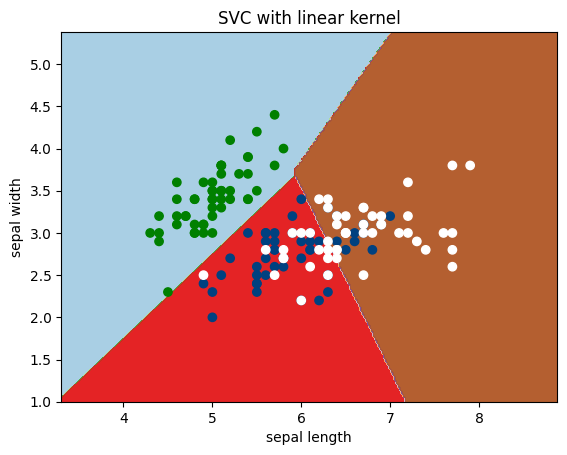

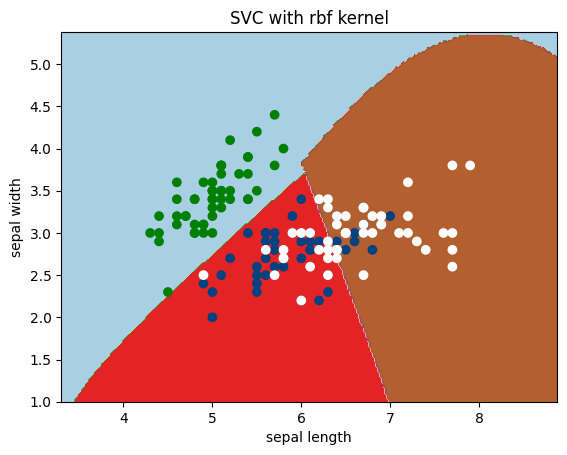

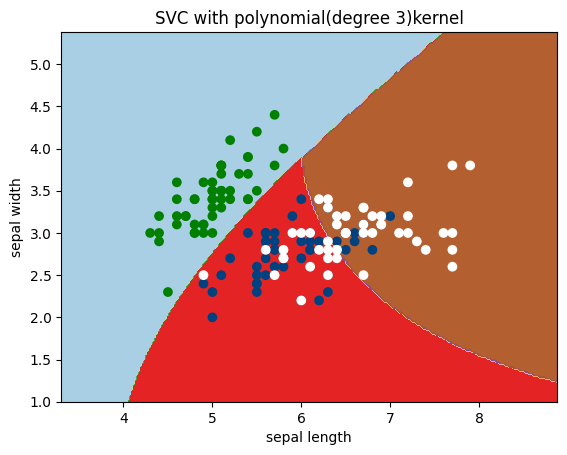

In [ ]:
#create a mesh to plot in
h = .02
x_min , x_max = X2[:, 0].min() - 1 , X2[:, 0].max() + 1
y_min , y_max = X2[:, 1].min() - 1 , X2[:, 1].max() + 1
xx ,yy = np.meshgrid(np.arange(x_min , x_max,h),
                     np.arange(y_min , y_max,h))

titles= ["SVC with linear kernel" , "SVC with rbf kernel" , "SVC with polynomial(degree 3)kernel"]

for i , clf in enumerate([svc , rbf_svc , poly_svc]):
    plt.figure(i)

    Z = clf.predict(np.c_[xx.ravel() , yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx ,yy ,Z , cmap = plt.cm.Paired , alpha = 0.8)

    plt.contourf(xx ,yy ,Z , cmap = plt.cm.Paired , alpha = 0.8)
    plt.scatter(X2[: , 0] , X2[: , 1] , c = y2 , cmap = plt.cm.ocean)
    plt.xlabel("sepal length")
    plt.ylabel("sepal width")
    plt.xlim(xx.min() , xx.max())
    plt.ylim(yy.min() , yy.max())
    plt.xticks()
    plt.yticks()
    plt.title(titles[i])
    plt.show()

In [ ]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import accuracy_score

In [ ]:
X3, y3 = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X3_train = X3[:60000]
y3_train = y3[:60000]
X3_test = X3[60000:]
y3_test = y3[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X3_train, y3_train)
y3_pred = lin_clf.predict(X3_train)
accuracy_score(y3_train, y3_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8348666666666666

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X3_train_scaled = scaler.fit_transform(X3_train.astype(np.float32))
X3_test_scaled = scaler.transform(X3_test.astype(np.float32))
lin_clf1 = LinearSVC(random_state=42)
lin_clf1.fit(X3_train_scaled, y3_train)
y_pred3 = lin_clf1.predict(X3_train_scaled)
accuracy_score(y3_train, y_pred3)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9214

In [ ]:
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X3_train_scaled[:10000], y3_train[:10000])
y_pred_rbf = svm_clf.predict(X3_test_scaled)
accuracy_score(y3_test, y_pred_rbf)

0.9389

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma":reciprocal(0.001, 0.1), "C":uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)

rnd_search_cv.fit(X3_train[:10000], y3_train[:10000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=2.2027325045048975, gamma=0.03482041864176844; total time=  51.4s
[CV] END ....C=2.2027325045048975, gamma=0.03482041864176844; total time=  50.5s
[CV] END ....C=2.2027325045048975, gamma=0.03482041864176844; total time=  52.3s
[CV] END ....C=4.395703142186246, gamma=0.003943441897172033; total time=  50.0s
[CV] END ....C=4.395703142186246, gamma=0.003943441897172033; total time=  51.4s
[CV] END ....C=4.395703142186246, gamma=0.003943441897172033; total time=  50.0s
[CV] END ..C=7.7799199477696925, gamma=0.0012616919135523686; total time=  51.3s
[CV] END ..C=7.7799199477696925, gamma=0.0012616919135523686; total time=  50.2s
[CV] END ..C=7.7799199477696925, gamma=0.0012616919135523686; total time=  51.7s
[CV] END ..C=4.2929672257379785, gamma=0.0021272202901314054; total time=  50.4s
[CV] END ..C=4.2929672257379785, gamma=0.0021272202901314054; total time=  55.9s
[CV] END ..C=4.2929672257379785, gamma=0.0021272

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a13579a07f0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a1359d4bdc0>},
                   verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=2.2027325045048975, gamma=0.03482041864176844)